# **Perform *Exploratory Data Analysis* on the `netflix_data.csv` data to understand more about movies from the 1990s decade**

## 1. Import necessary libraries

In [46]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils.utils import draw_stars_line

## 2. Load data

In [47]:
# Load the dataset
data = pd.read_csv('netflix_data.csv')
# show the first 5 rows
print(data.head())

  show_id     type  title           director  \
0      s2    Movie   7:19  Jorge Michel Grau   
1      s3    Movie  23:59       Gilbert Chan   
2      s4    Movie      9        Shane Acker   
3      s5    Movie     21     Robert Luketic   
4      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
4  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year  duration  \
0  December 23, 2016          2016        93   
1  December 20, 2018          2011        78   
2  November 16, 2017          2009        80   
3    January 1, 2020          2008       123   
4       July 1, 2017          2016         1

## 3. Data information: Columns, shape, dtypes, missing values

In [48]:
# Display the first few rows of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None


## 4. FILTERING MOVIES

### Check `type` column

In [49]:
# Check type column
type_col = 'type'
print(data[type_col].value_counts())

draw_stars_line()

print(data[type_col].unique())



type
Movie      4677
TV Show     135
Name: count, dtype: int64


**************************************************

['Movie' 'TV Show']


### Movies data

In [50]:
# Movie data
movie_data = data[data[type_col] == 'Movie']
# Show the first 5 rows of movie data
print(movie_data.head())

  show_id   type  title           director  \
0      s2  Movie   7:19  Jorge Michel Grau   
1      s3  Movie  23:59       Gilbert Chan   
2      s4  Movie      9        Shane Acker   
3      s5  Movie     21     Robert Luketic   
5      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
0  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year  duration  \
0  December 23, 2016          2016        93   
1  December 20, 2018          2011        78   
2  November 16, 2017          2009        80   
3    January 1, 2020          2008       123   
5       June 1, 2020          2019        95   

       

### 1990s Decade Movies

In [51]:
# 1990s decade movie data
decade_1990s_movies = movie_data[(movie_data['release_year'] >= 1990) & (movie_data['release_year'] < 2000)]
# Show the first 5 rows of 1990s decade movie data
print(decade_1990s_movies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 6 to 4756
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       183 non-null    object
 1   type          183 non-null    object
 2   title         183 non-null    object
 3   director      183 non-null    object
 4   cast          183 non-null    object
 5   country       183 non-null    object
 6   date_added    183 non-null    object
 7   release_year  183 non-null    int64 
 8   duration      183 non-null    int64 
 9   description   183 non-null    object
 10  genre         183 non-null    object
dtypes: int64(2), object(9)
memory usage: 17.2+ KB
None


### The most frequent movie duration in the 1990s

The most frequent movie duration in the 1990s is 94 minutes.


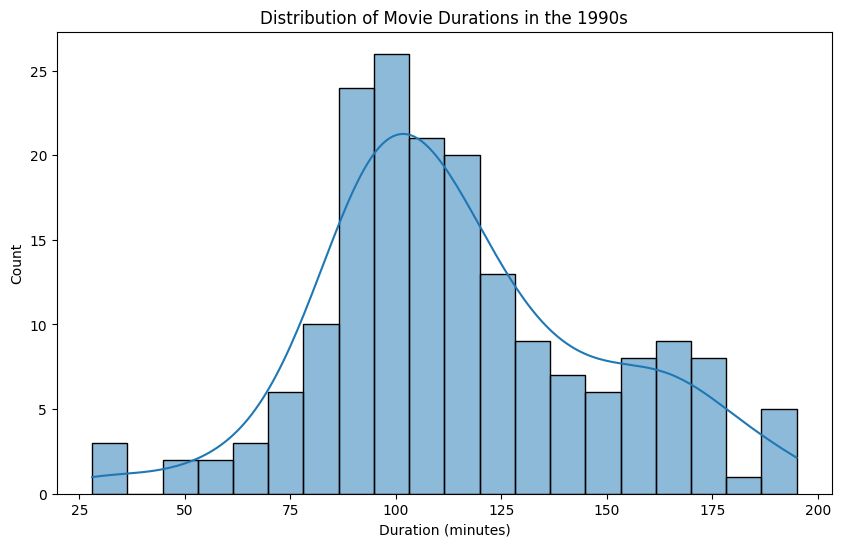

In [59]:
duration_col = 'duration'

# plot the distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(decade_1990s_movies[duration_col], bins=20, kde=True)
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')

# The most frequent movie duration in the 1990s

duration = int(decade_1990s_movies[duration_col].mode()[0])
print(f"The most frequent movie duration in the 1990s is {duration} minutes.")


### The number of short action movies released in the 1990s

> 
> A movie is considered short if it is less than 90 minutes
> 

In [60]:
# Shortest movie in the 1990s
shortest_movie = decade_1990s_movies[decade_1990s_movies[duration_col] < 90]
print(shortest_movie[['title', 'release_year', duration_col]].head())

short_movie_count = len(shortest_movie)
print(f"Number of shortest movies in the 1990s: {short_movie_count}")

                                                 title  release_year  duration
145                             A Night at the Roxbury          1998        82
333                 An American Tail: Fievel Goes West          1991        75
334  An American Tail: The Mystery of the Night Mon...          1999        75
428                  Auschwitz: Blueprints of Genocide          1994        49
479                                              Balto          1995        78
Number of shortest movies in the 1990s: 34
